
#**Project**

#Customer Segmentation using RFM Analysis and K-Means Clustering

#Description:
As part of my MBA Business Analytics coursework, I worked on customer segmentation for a fictional online retail company to help the marketing team design targeted strategies. The project involved data cleaning, analysis, applying RFM segmentation, clustering, and building visual dashboards.

#Project Steps & Methodology:
Data Collection & Cleaning:
Imported CSV data containing customer transactions — CustomerID, InvoiceDate, InvoiceNo, Quantity, UnitPrice.

#Feature Engineering:
Calculated Recency (days since last purchase), Frequency (number of purchases), and Monetary (total spend).

#Segmentation:
Used K-Means clustering on scaled RFM data to segment customers.

#Visualization:
Created plots and dashboards to showcase customer segments and insights.



# Import libraries

import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import libraries
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('/content/OnlineRetailSample.csv')

In [ ]:
# Data cleaning: remove missing CustomerIDs and negative quantities
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]

In [ ]:
# Compute TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
# Reference date for Recency calculation
reference_date = datetime(2011, 12, 10)

In [ ]:
# Calculate RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

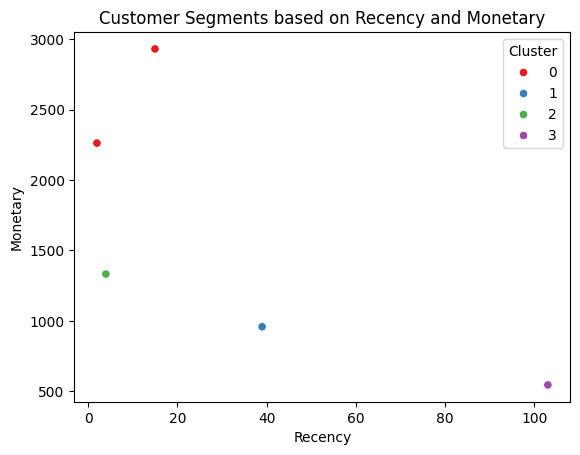

In [ ]:
# Visualize clusters
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Recency and Monetary')
plt.show()

In [ ]:
# Show segment summary
print(rfm.groupby('Cluster').mean())

         CustomerID  Recency  Frequency  Monetary
Cluster                                          
0           10003.5      8.5       14.0  2596.045
1           10004.0     39.0        6.0   958.190
2           10001.0      4.0       11.0  1332.270
3           10003.0    103.0        5.0   545.400


#Outcome:
Identified 4 customer segments (e.g., loyal, at-risk, new, big spenders).
Provided insights for personalized marketing strategies.

#Tools & Techniques Used:
Python (Pandas, scikit-learn, seaborn), K-Means Clustering, RFM analysis, data visualization
